# Plotting Figure 10
> Shape optimization for Slit Duct

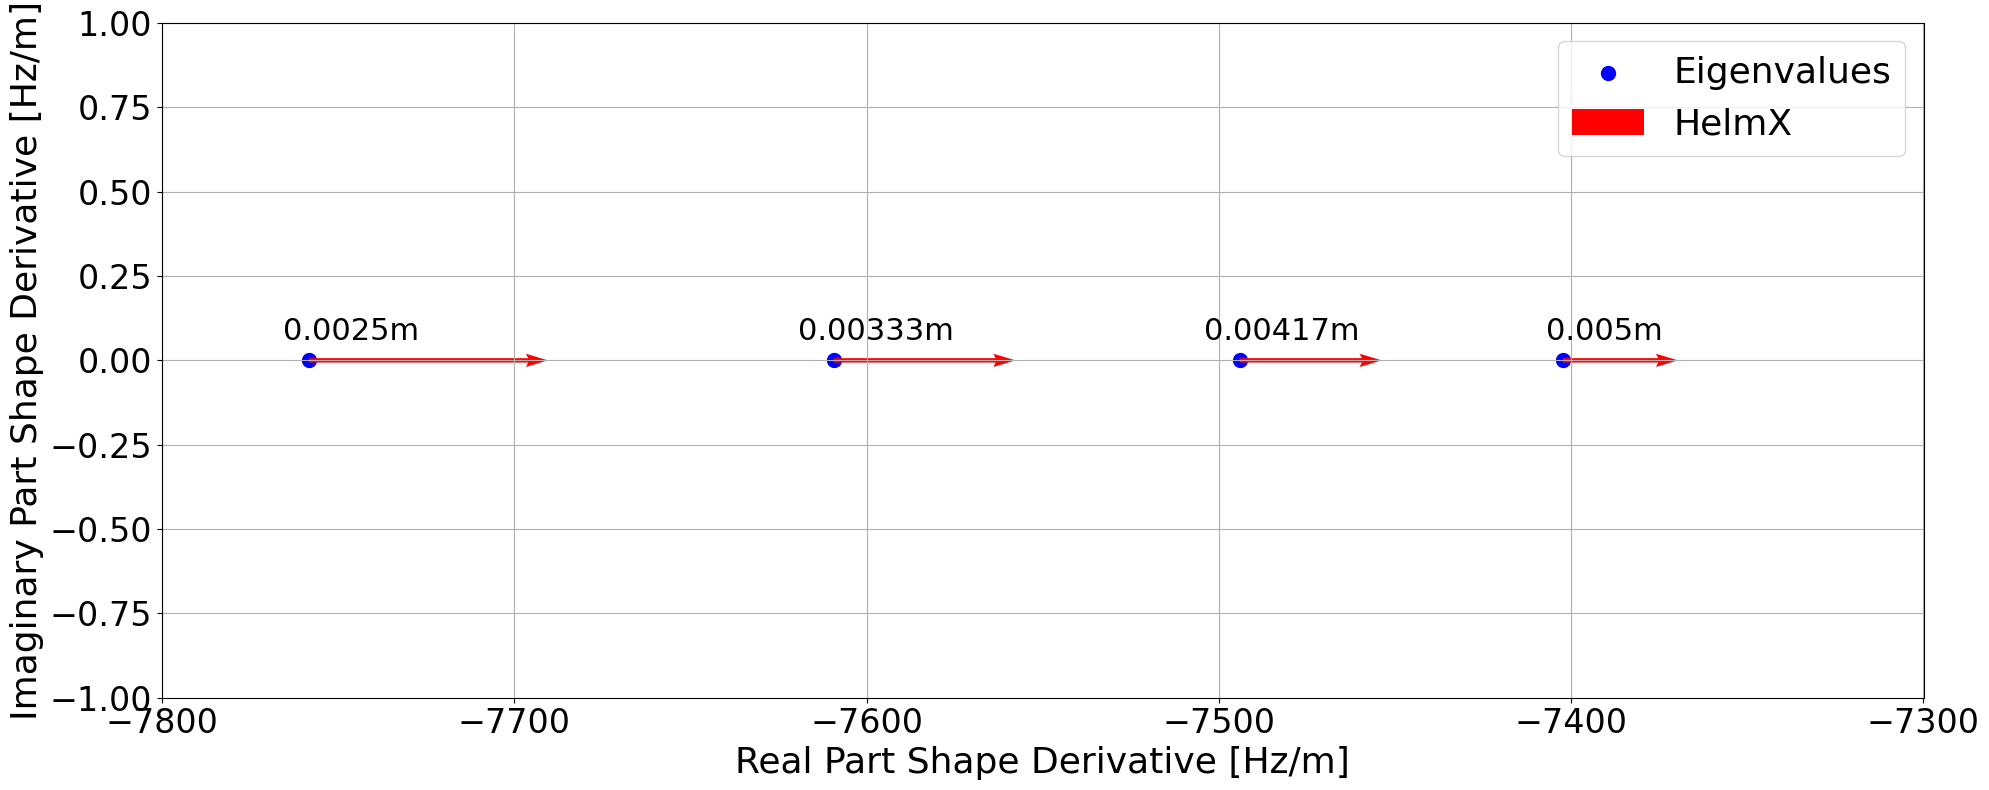

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

# set path to data
os.chdir(os.path.join(os.getcwd()))
file = os.path.join('data_fig10.txt')

# read file
with open(file, 'r') as f:
    lines = f.readlines()

# create empty lists to store the data
duct = []
eigenvalues = []
helmx = []
dynx = []

# read the data from the file
for line in lines[1:]: # skip the first line
    duc, eig, helm = line.strip().split(',')
    duct.append(round(float(duc),5))
    eigenvalues.append(complex(eig))
    helmx.append(complex(helm))
    #dynx.append(complex(dyn))

# transform the lists into numpy arrays to perform operations
duct = np.array(duct)
eigenvalues = np.array(eigenvalues)
helmx = np.array(helmx)
dynx = np.array(dynx)

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(20, 8))

# Plot eigenvalues on the complex plane
ax.scatter(eigenvalues.real, eigenvalues.imag, s=100 ,color='blue', label='Eigenvalues')
# Add labels to each point
for i, txt in enumerate(duct):
    ax.annotate(f'{txt}m', (eigenvalues[i].real, eigenvalues[i].imag), fontsize=22,
                 textcoords="offset points", xytext=(30,15), ha='center')

scale = 3000
# Add arrows for continuous and discrete shape derivatives
for i in range(len(eigenvalues)):
    ax.quiver(eigenvalues[i].real, eigenvalues[i].imag, helmx[i].real/scale, helmx[i].imag/scale,
               angles='xy', scale_units='xy', scale=1, color='red', label='HelmX' if i == 0 else "", width=0.0025)
    #ax.quiver(eigenvalues[i].real, eigenvalues[i].imag, dynx[i].real/scale, dynx[i].imag/scale,
    #           angles='xy', scale_units='xy', scale=1, color='green', label='DynX' if i == 0 else "", width=0.0025)
    #ax.arrow(eigenvalues[i].real, eigenvalues[i].imag, continuous[i].real/scale, continuous[i].imag/scale, head_width=0.01, head_length=1)
    #ax.arrow(eigenvalues[i].real, eigenvalues[i].imag, discrete[i].real/scale, discrete[i].imag/scale, head_width=0.01, head_length=1)

ax.set_ylim(-1, 1)
ax.set_xlim(-7800, -7300)

# Set the fontsize of the tick labels
ax.tick_params(axis='both', which='major', labelsize=24)
# Set labels and title
ax.set_xlabel('Real Part Shape Derivative [Hz/m]', fontsize=26)
ax.set_ylabel('Imaginary Part Shape Derivative [Hz/m]', fontsize=26)
ax.legend(fontsize=26)
ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()
